# Rayna Hamilton
# 605.621: Introduction to Algorithms
# Final Project: Analysis of Dynamic Programming for Protein Sequence Alignment 
# July 23 2022


## Introduction

Below we present an analyis of the related dynamic programming algorithms for sequence alignment, Needleman-Wunsch and Smith-Waterman.  These algorithms will be evaluated for correctness, time complexity and space complexity. Both were developed with the goal of aligning DNA, RNA and protein sequences to find regions of homology between related sequences.  Such regions may represent functionally important, evolutionarily conserved sequences such as protein-coding genes [1]. Dynamic programming alignment is also valuable for ascertaining the degree of relatedness between different species [2].  Alignment quality is described by a summed score which rewards matching sequence characters and penalizes mismatches and gaps; consequently, determining the best alignment is an optimization problem [2].  This problem can be broken down into subproblems describing the best alignment character-by-character, however as score depends on the alignment of both the current and previous characters, these subproblems are overlapping.  Such problems can be solved through dynamic programming algorithms which use memoization to remember the solutions of previously computed subproblems [3].  Two versions of the dynamic programming alignment algorithm exist: Needleman-Wunsch, which calculates the optimal global (end-to-end) alignment, and Smith-Waterman, which calculates the best-scoring local alignment (not necessarily including all characters from both sequences).  Both algorithms plot a path through a 2D scoring matrix, though Smith-Waterman terminates paths and resets the score to 0 when a negative score is reached, thus often generating multiple smaller paths [1].  Algorithm correctness will be evaluated by comparing alignment scores to a literature alignment implementation with the same scoring metrics, as identical scores indicate solution optimality.  Algorithms will also be subject to basic canonical data tests with logically obvious outputs.  Such tests include identical sequences with all the same letter which should produce no gaps, sequences with highly similar subsequences that should be identified by local alignment, and sequences which are near-identical excluding an insertion, which the algorithm should identify as a gap.  Time complexity will be evaluated empirically using global counter variables which are incremented whenever a constant-time operation is performed.  Time complexity will be measured for a variety of input string sizes and plotted relative to functions representing different complexities (constant, logarithmic, linear, polynomial) to ensure that the appropriate growth rate is observed.


##   The Algorithm

### Global alignment: 

The Needleman-Wunsch algorithm performs the following steps:

1) Generate an n by m matrix, where n and m represent sequence lengths. A matrix can be represented by a 2D numpy array.  Initialize scores along the first row and first column, assuming that each position represents a gap (beginning at 0, subtract one gap penalty for each horizontal or vertical step).

2) Fill in cells row by row, proceeding from left to right. At each cell, calculate:

$score(i,j) = max\begin{cases}
  score_{i-1,j}+score_{gap} \\
  score_{i-1,j-1}+score_{match/mismatch} \\
  score_{i,j-1}+score_{gap} 
\end{cases}$

where i and j represent matrix positions, $score_{gap}$ represents a negative gap penalty, and $score_{match/mismatch}$ depends on the characters at position (i,j).

3) Beginning at the last cell filled, follow the recorded path until reaching the origin cell to produce the optimal alignment. Diagonal steps represent matches, vertical steps represent gaps in the first sequence, and horizontal steps represent gaps in the second sequence.  While backtracking, append the associated sequence characters in three python lists (representing the two sequences and another string which is used for printing, where ' ' is used to indicate gaps, '|' is used to indicate matches, and '.' is used to indicate mismatches).  After backtracking, reverse the lists and concatenate them to strings.

### Local alignment: 

The related Smith-Waterman algorithm uses three modifications to the above steps:

1) Initialize all first row and first column scores as 0.

2) 
$score(i,j) = max\begin{cases}
  score_{i-1,j}+score_{gap} \\
  score_{i-1,j-1}+score_{match/mismatch} \\
  score_{i,j-1}+score_{gap} \\
  0
\end{cases}$

3) When backtracking, start at the highest-scoring cell and terminate once a 0 value is reached.

## Theoretical Space Complexity

The dynamic programming portion of both algorithms must generate and populate two n by m matrices, where m and n represent sequence lengths. All other temporary variables used each iteration exhibit approximately constant space complexity relative to input size.  Additionally, there is no situation which can result in this matrix not being entirely created or larger in size, so the space complexity has no best or worst case.  Therefore:

#### Dynamic programming space complexity (all cases) = Θ(mn)

The backtracking phase utilizes the same matrices created in the dynamic programming phase, thus also exhibiting Θ(mn) space complexity.  This phase also creates and populates three lists representing alignment results, which are later converted into strings.  All three lists exhibit maximum length equal to the longest input sequence, therefore exhibiting Θ(3n)=Θ(n) additional space complexity, where n is the longer sequence.  In practice this space complexity is overtaken by the Θ(mn) space usage of the 2D matrices from the dynamic programming stage.


## Theoretical Time Complexity

Both algorithms traverse an n by m matrix, visiting each cell once. This process can be implemented using 2 nested loops with sizes m+1 and n+1.  There is no need for a third loop, nor is there any situation where dynamic programming can stop early, indicating no best or worst case.  Furthermore, each individual cell's calculations occur in approximately constant time when excluding the fact that larger numbers may take longer to calculate. Therefore:

#### Dynamic programming time complexity (all cases) =  Θ(mn)    [1]

When sequence lengths differ, the global alignment backtracking phase will perform approximately m iterations, where m is the longer sequence length.  Each loop iteration performs three list append operations, which exhibit constant time if the underlying array data structure does not need to be extended (amortized analysis also indicates that list append operations, like stack pushes, as O(1) on average even when array copies are included).  However, when the length of the shorter sequence is increased, more matrix position updates will be performed even if the number of iterations does not change (as more will likely be diagonal steps, which include two position updates).  In other words, for sequences with length m and n, m+n index updates must be performed.  Therefore:

#### Global backtracking time complexity (all cases) = Θ(m+n) 

Local alignment backtracking performs the same steps as global backtracking, however backtracking can start at any maximum-scoring cell and stop at any point when a 0 score is reached (i.e. it can theoretically take approximately constant time).  In the worst case, the whole path is traversed and the local alignment equals the global alignment. Therefore:

#### Local backtracking time complexity (best case) = O(1)
#### Local backtracking time complexity (worst case) = O(m+n)
#### Local backtracking time complexity (average case) = O(m+n)
#### Local backtracking time complexity (special case)=O(m)

The special case represents any situation where the shorter sequence (length m) is highly similar to a subset of the longer sequence, such as a homologous gene and a genome. 
As the performance of the dynamic programming step is quadratic, this step's complexity will overtake the backtracking step for sufficiently large m and n.  Therefore:

## Total algorithm time complexity (all cases) =  Θ(mn)

## Algorithm efficiency and optimality - theoretical

As dynamic programming algorithms, both Needleman-Wunsch and Smith-Waterman alignment divide the alignment problem into a series of overlapping subproblems which depend upon the solutions to previous subproblems.  As each cell contains the optimal solution for that location, the principle of optimality dictates that the final returned solution will be optimal [3]. Its time complexity is also favourable in comparison to a naive brute-force approach (compute all possible alignments and return the best-scoring result), whose time complexity is exponential [1].

## Algorithm script

In [1]:
import numpy as np
SKIPX, SKIPY, ADDXY = '|', '-', '+'#characters to indicate backtracking direction
score_gap=-4#this is the lowest mismatch score in the Blosum matrix we will be using, so we consider gaps at least as penalizing as the most costly substitution
score_match,score_mismatch=2,-1#fallback values in case any found characters are not in our substitution matrix

# Note that c, d and e represent global counter variables so the complexity of lines incrementing these variables is not considered
def score_pair(a,b,matrix):# Determines a substitution pair score based on provided substitution matrix
    global c 
    
    if (a,b) in matrix.keys():#Θ(1) - this matrix is the amino acid score matrix which is always the same size
        c+=1
        return matrix[(a,b)]#Θ(1) - this matrix is a dictionary which functions like a hash table
    elif (b,a) in matrix.keys():#Θ(1)
        c+=2#include previous else statements as operations
        return matrix[(b,a)]#Θ(1)
    elif a==b:#Θ(1)
        c+=3
        return score_match#Θ(1)
    else:
        c+=4
        return score_mismatch #Θ(1)

def dynamic_align(x, y):#Populates a dynamic programming matrix using two input string sequences
    global c
    c=0
    M, N = len(x), len(y) #Θ(1)
    maxx,maxy=0,0 #Θ(1)
    c+=6#four assignments and two length operations
    loc = np.full((N+1, M+1), 0, dtype=int)  # local score matrix, Θ(mn)
    locbac = np.full((N+1, M+1), ' ', dtype=str)  # local backtracking matrix, Θ(mn)
    
    glob = np.full((N+1, M+1), 0, dtype=int)  # global score matrix, Θ(mn)
    globbac = np.full((N+1, M+1), ' ', dtype=str)  # global backtracking matrix, Θ(mn)
    
    c+=(N+1)*(M+1)*4#matrix allocations
    for i in range(0, N+1):  # Fill the boundary,  Θ(n)
        loc[i,0], glob[i,0], locbac[i,0], globbac[i,0] = 0, score_gap*i, SKIPX, SKIPX #Θ(1)
        c+=4#3 assignments and 1 multiplication

    for j in range(0,M+1):  # Fill the boundary, Θ(m)
        loc[0,j], glob[0,j], locbac[0,j], globbac[0,j] = 0, score_gap*j, SKIPY, SKIPY #Θ(1)
        c+=4#3 assignments and 1 multiplication
                
    for i in range(1, N+1):  # Θ(m)
        for j in range(1, M+1):   #Θ(mn)
            glob[i,j],globbac[i,j]=choose_best(glob[i-1,j],glob[i,j-1],glob[i-1,j-1],x[j-1],y[i-1]) #Θ(1)
            loc[i,j],locbac[i,j]=choose_best(loc[i-1,j],loc[i,j-1],loc[i-1,j-1],x[j-1],y[i-1],0) #Θ(1)
            if loc[i,j]>=loc[maxx,maxy]: #Θ(1)
                maxx,maxy=i,j #Θ(1)

                
    return loc,locbac,glob,globbac,maxx,maxy

def choose_best(left,top,diag,base1,base2,min_score=-np.inf):#Picks the best directional step for an individual cell (diagonal, horizontal or vertical)
    global c
    c+=7#6 arguments and function call
    temp=score_pair(base1,base2,matrix) #Θ(1)
    
    if min_score>diag+temp and min_score>left+score_gap and min_score>top+score_gap: #Θ(1)
        c+=7#3 addition and 3 comparison at most, if statement itself
        return min_score,' ' #Θ(1)
    elif diag+temp>=left+score_gap and diag+temp>=top+score_gap: #Θ(1)
        c+=12#2 addition and 2 comparison, 7 from previous if statement, elif statement
        return diag+temp,ADDXY #Θ(1)
    elif left+score_gap>diag+temp: #Θ(1)
        c+=15
        return left+score_gap,SKIPX #Θ(1)
    else: #Θ(1)
        c+=16
        return top+score_gap,SKIPY #Θ(1)


def global_align(b: np.array, X: str, Y: str,scores,startx=None,starty=None) -> (str,str):#Performs backtracking to produce an optimal global alignment
    #Large portions of this code are also used by the local alignment backtracking, so the appropriate complexities are indicated
    global d
    d=0
    # start from the lower right corner - global alignment
    (N,M) = b.shape #Θ(1)
    s1, align, s2 = [], [],[]  # s1 corresponds to X, s2 corresponds to Y,align is an extra string used for printing, Θ(1)
    local=True #whether the function is being called from the local_align function, Θ(1)
    d+=5#5 assignments
    
    if startx==None and starty==None: #Θ(1)
        i, j = N-1, M-1 #Θ(1)
        local=False #Θ(1)
        d+=7
    else: #Θ(1)
        i,j=startx,starty #Θ(1)
        d+=5#2 booleans in previous if check, else statement, 2 assignments
    
    clist = [(i+1,j+1)] #Θ(1)
    global iterations
    iterations=0
    while i>0 or j>0: #Θ(m+n) for global alignment, O(m+n) for local alignment
        
        d+=2#while statement
        if local and scores[i,j]==0: #Θ(1)
            d+=3
            s1.reverse() #O(m), where m is longer sequence (the shorter sequence has been padded to the same length with gaps at this point).  
            align.reverse() #O(m)
            s2.reverse() #O(m) 
            d+=len(align)*3#O(m) operation to join each array sequence
            return ''.join(s1),''.join(align),''.join(s2) #O(m)
        
        iterations+=1
        s1a,s2a,aligna='','','' #Θ(1)
        d+=4
        if b[i,j] == ADDXY: #Θ(1)
            d+=2
            s1a,s2a=X[j-1],Y[i-1] #Θ(1)
            
            if X[j-1]==Y[i-1]: #Θ(1)
                aligna='|' #Θ(1)
            else: #Θ(1)
                aligna='.' #Θ(1)
            i=i-1 #Θ(1)
            j=j-1 #Θ(1)
            d+=14#4 array access,6 assignment, 2 ifs, 2 subtraction
        elif b[i,j] == SKIPX: #Θ(1)
            d+=4#this and previous if statement
            s1a,aligna,s2a='-',' ',Y[i-1] #Θ(1)
            i=i-1 #Θ(1)
            
            d+=5
        elif b[i,j] == SKIPY: #Θ(1)
            d+=6
            s1a,aligna,s2a=X[j-1],' ','-' #Θ(1)
            j=j-1 #Θ(1)
            d+=5
        
        clist.append((i+1,j+1)) #Θ(1) - amortized
        s1.append(s1a) #Θ(1) - amortized
        s2.append(s2a) #Θ(1)
        align.append(aligna) #Θ(1)
        d+=6
        
    if i==0 or j==0: #Θ(1)
        clist.append((i+1,j+1))#Θ(1)
        d+=5  
    s1.reverse() #Θ(m) for global alignment
    align.reverse() #Θ(m)
    s2.reverse() #Θ(m)
    s1, align,s2 = ''.join(s1),''.join(align), ''.join(s2) #Θ(m)
    d+=len(align)*3
    if local: #Θ(1)
        return s1, align,s2 #Θ(1)
    return s1, align,s2, scores[N-1,M-1],clist #Θ(1)

def local_align(loc:np.array,locbac,X,Y,maxx,maxy): #Performs backtracking to produce an optimal local alignment
    global e
    global d
    
    d=0
    s1,align,s2=global_align(locbac,X,Y,loc,maxx,maxy) #O(m+n)
    e=d
    return s1,align,s2,loc[maxx][maxy] #Θ(1)
                

## Canonical test data generation

Substitutions between amino acids may be highly evolutionarily detrimental, if the amino acids have very different properties (i.e. different sizes or charges), or minimally significant, if the amino acids are very similar.  Therefore, rather than penalizing all mismatches equally, we will use a literature substitution matrix calculated from a large number of protein sequence alignments.  We will use the general-purpose Blosum62 matrix, which is present in the Biopython library as a dictionary of scores, indexed by tuples representing amino acid pairs.

In [2]:
#get all amino acid characters from blosum score matrix for random selection
import warnings
warnings.filterwarnings('ignore')

from Bio.SubsMat import MatrixInfo as matlist
matrix = matlist.blosum62

all_aas=[]
for pair in matrix.keys():
    for aa in pair:
        if aa not in all_aas:
            all_aas.append(aa)

In [3]:
test_data=dict() 

When all characters are the same letter in both sequences, a perfect diagonal traversal should be seen as every diagonal step is associated with a positive match score (there is no need to insert any negative-scoring gaps).  The bottom-right corner will have the maximum score, so local and global alignments should be identical.

In [4]:
#All same letter - should be perfect diagonal, same local and global alignment
test_data["All same letter"]=("AAAAAA","AAAAAA")

When all characters are random, no meaningful alignment will exist, but the algorithm will probably take mostly diagonal steps as gap insertion is unlikely to generate many more matches.

In [5]:
import random
random.seed(64)
X="".join(random.sample(all_aas,7))
random.seed(128)
Y="".join(random.sample(all_aas,7))

test_data["Random letters"]=(X,Y)

When two different random sequences share a small highly similar region, they will exhibit a poor, near-random global alignment but the similar region should be picked up by local alignment.

In [6]:
random.seed(200)
X="".join(random.sample(all_aas,13))+X[0:5]
random.seed(421)
X=X+"".join(random.sample(all_aas,7))
random.seed(43)
Y="".join(random.sample(all_aas,6))+X[0:5]
random.seed(320)
Y=Y+"".join(random.sample(all_aas,5))

test_data["Local similarity"]=(X,Y)

When two sequences are highly similar except for an insertion or deletion, the algorithm should put a gap in the appropriate location.  Local alignment may return one of the highly similar regions, or both regions if the deletion itself is fairly small.

In [7]:
random.seed(634)
X="".join(random.sample(all_aas,10))
Y=X[0:2]+"A"+X[3:4]+X[7:]

test_data["Deletion present"]=(X,Y)

## Sample test data - the Dystrophin gene mutated in muscular dystrophy
Duchenne muscular dystrophy, a muscle degenerative disease which manifests initially as skeletal muscle weakness and progresses to inability walking and defective heart muscle, currently has a median life expectancy of 28 years [4],[5].  The condition occurs in one in 5000 boys and is generated by mutations in the dystrophin gene located on the X chromosome. The dystrophin protein is found within the cell membrane of muscle cells and is responsible for connecting the cell cytoskeleton to the extracellular matrix.  A common mutation pattern involves a shift in the RNA-to-protein reading frame, which generally creates a premature stop codon and a truncated, nonfunctional protein.  Furthermore, dystrophin is one of the longest coding genes in humans and thus its protein product is suitable for testing the time complexity of alignment algorithms with a range of sequence lengths [4].  For global alignment complexity measurements, the human protein sequence will be compared to the homologous pig sequence, which is similar enough to produce meaningful alignments while still testing for the algorithms' ability to detect insertions, deletions and substitutions.  The normal human sequence will also be compared to a representative truncated Duchenne muscular dystrophy sequence, which contains a premature stop codon instead of a glutamine at position 1035 [6],[7],[8].

In [8]:
human=open("human_dystrophin.fasta").readlines()
human="".join([line.strip() for line in human[1:]])
print(f"The normal human sequence is length {len(human)}.  Here are the first few characters:")
print(human[:100])

trunc=open("dystrophy_dystrophin.fasta").readlines()
trunc="".join([line.strip() for line in trunc[1:]])
print(f"The truncated human sequence is length {len(trunc)}.  Here are the first few characters:")
print(trunc[:100])


pig=open("pig_dystrophin.fasta").readlines()
pig="".join([line.strip() for line in pig[1:]])
print(f"The pig sequence is length {len(pig)}.  Here are the first few characters:")
print(pig[:100])

The normal human sequence is length 3685.  Here are the first few characters:
MLWWEEVEDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIV
The truncated human sequence is length 1034.  Here are the first few characters:
MLWWEEVEDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIV
The pig sequence is length 3674.  Here are the first few characters:
MSEVSSDEREDVQKKTFTKWINAQFSKFGKQHIENLFNDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALQVLQKNNVDLVNIGSTDIVDGNH


## Algorithm visualization utility scripts

In [9]:
def print_alignment(s1,align,s2,score):# Prints an alignment with lines wrapped at 100 characters
    i=0
    while i<len(s1):
        print(s1[i:min(i+100,len(s1))])
        print(align[i:min(i+100,len(s1))])
        print(s2[i:min(i+100,len(s1))])
        i+=100
    print(f"Score = {score}")

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

from matplotlib import colors

def plot_matrix(A,X,Y,clist,directions): # Visualizes the global dynamic programming matrix with scores, arrows, and the chosen path coloured
    arrowdict={'|':r'$\uparrow$','-':r'$\leftarrow$','+':r'$\nwarrow$',' ':''}
    m = len(Y)
    n = len(X)
    fig, ax = plt.subplots(figsize=(m,n))
    
    data = np.zeros((m+2,n+2))
    for x,y in clist:
        data[x,y]=1
    # create discrete colormap
    cmap = colors.ListedColormap(['white', 'yellow'])
    norm = colors.BoundaryNorm([0,0.5,1], cmap.N)
    ax.matshow(data,cmap=cmap)
    for krow, row in enumerate(A):
        if krow>0:
            ax.text(0, krow+1, Y[krow-1],
                     horizontalalignment='center',
                     verticalalignment='center')
        for kcol, num in enumerate(row):
            if krow == 0:
                if kcol>0:
                    ax.text(kcol+1, 0, X[kcol-1],
                             horizontalalignment='center',
                             verticalalignment='center')
                    
            ax.text(kcol+1, krow+1, str(num)+arrowdict[directions[krow,kcol]],
                     horizontalalignment='center',
                     verticalalignment='center')
            
    ax.set_xticks(np.arange(-.5, n, 1), minor=True)
    ax.set_yticks(np.arange(-.5, m, 1), minor=True)
    plt.grid(linestyle="solid",which="minor")
    plt.show()


## Algorithm validation and canonical tests

The alignment implementation will be compared to the Biopython implementations of Needleman-Wunsch and Smith-Waterman.  As multiple optimal alignments can produce the same score, only the scores will be directly compared to confirm that our implementation is returning an optimal solution.  The global dynamic programming matrix will also be visualized for each test.

In [11]:
#we will also compare the score obtained to make sure it is the same optimum score obtained by Biopython module
#this is done rather than comparing alignment characters directly as multiple optimal alignments may exist
def compare_scores(custom_score,biopython_score):
    if custom_score==biopython_score:
        print(f"Optimal alignment score = {custom_score} as expected.")
    else:
        print(f"Optimal alignment score = {custom_score} but was expecting {biopython_score}.")

In [12]:
from Bio import pairwise2
global c
global d 
global e

global iterations
def canon_test(X,Y):#Calls dynamic alignment as well as global and local backtracking, then compares the results to Biopython alignment
    global clist
    c,d,e=0,0,0
    localscores,localarrows,globalscores,globalarrows,maxx,maxy=dynamic_align(X,Y)
    print("Global alignment:")
    
    s1, align,s2,score,temp = global_align(globalarrows, X,Y,globalscores)
    clist=temp
    temp_d=d
    global_iteration=iterations
    print_alignment(s1,align,s2,score)
    compare_scores(score,pairwise2.align.globalds(X,Y, matrix,score_gap,score_gap,score_only=True))
    s1, align,s2,score= local_align(localscores, localarrows, X,Y,maxx,maxy)
    local_iteration=iterations
    d=temp_d
    print("Local alignment:")
    print_alignment(s1,align,s2,score)
    compare_scores(score,pairwise2.align.localds(X,Y, matrix,score_gap,score_gap,score_only=True))
    print(f"Local alignment length = {len(align)}.")
    return globalscores,globalarrows,clist,global_iteration,local_iteration

Test case: All same letter:
Global alignment:
AAAAAA
||||||
AAAAAA
Score = 24
Optimal alignment score = 24 as expected.
Local alignment:
AAAAAA
||||||
AAAAAA
Score = 24
Optimal alignment score = 24 as expected.
Local alignment length = 6.


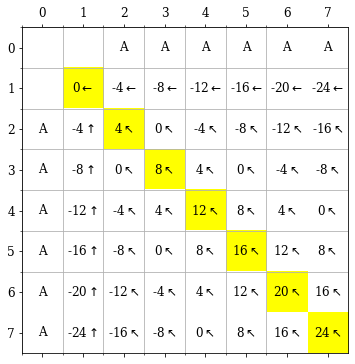

Test case: Random letters:
Global alignment:
MRCBYIW
......|
TYGZSMW
Score = 5
Optimal alignment score = 5 as expected.
Local alignment:
IW
.|
MW
Score = 12
Optimal alignment score = 12 as expected.
Local alignment length = 2.


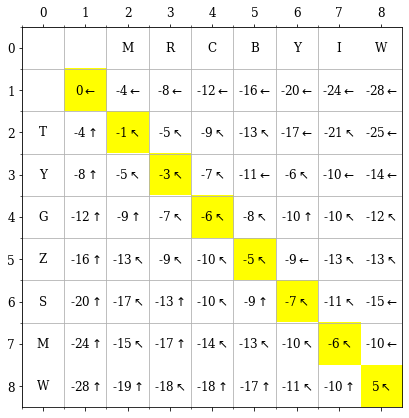

Test case: Local similarity:
Global alignment:
FVWSQCHPZITBYMRCBYCBKQMEX
|  .. |.... ... ..|   . .
F--NS-HZRFV-WSQ-HGC---L-I
Score = -13
Optimal alignment score = -13 as expected.
Local alignment:
FVWSQCH
||||| |
FVWSQ-H
Score = 34
Optimal alignment score = 34 as expected.
Local alignment length = 7.


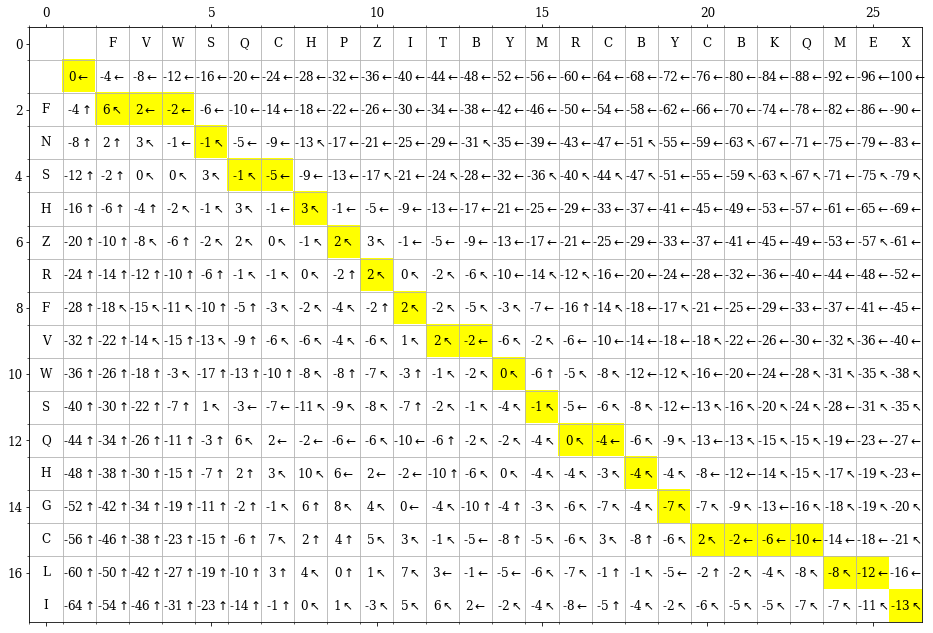

Test case: Deletion present:
Global alignment:
STCWEHGKQY
||.|   |||
STAW---KQY
Score = 25
Optimal alignment score = 25 as expected.
Local alignment:
STCWEHGKQY
||.|   |||
STAW---KQY
Score = 25
Optimal alignment score = 25 as expected.
Local alignment length = 10.


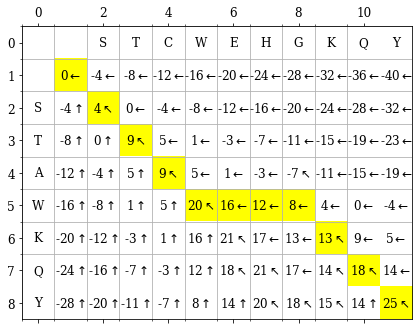

In [13]:
global c
global clist
for test_case,(X,Y) in test_data.items():
    print(f"Test case: {test_case}:")
    globalscores,globalarrows,clist,ignore1,ignore2=canon_test(X,Y)
    plot_matrix(globalscores,X,Y,clist,globalarrows)

All four canonical tests returned the expected results.  Use of two identical sequences produced a perfect diagonal alignment for both local and global, as introduction of gaps in either sequence would reduce the  score with no improvement in the number of matches.  Random letters also produced a diagonal alignment, as the gap penalty is as costly than any of the substitution penalties specified by the Blosum62 matrix.  As expected, this local alignment was very small for random letters (just two characters which happened to be similar amino acids by chance).  The global alignment local similarity test appears similar to the random test, as characters outside the local similarity region are different random sequences and thus have no homology.  The expected 6-bp highly similar region was picked up by local alignment.  Finally, the deletion test with highly similar sequences on each side produced a gap in the expected position in the global alignment.  In this case, the deletion is fairly small and minimally penalizing, so the local alignment still picked up characters on each end.

### Comparison of normal human to muscular dystrophy human (local alignment test):

In [14]:
globalscores,globalarrows,ignore,global_iteration,local_iteration=canon_test(human,trunc)

Global alignment:
MLWWEEVEDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIV
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
MLWWEEVEDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIV
DGNHKLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAF
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
DGNHKLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAF
NIARYQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYA
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
NIARYQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYA
YTQAAYVTTSDPTRSPFPSQHLEAPEDKSFGSSLMESEVNLDRYQTALEEVLSWLLSAEDTLQAQGEISNDVE

Optimal alignment score = -5285 as expected.
Local alignment:
MLWWEEVEDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIV
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
MLWWEEVEDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIV
DGNHKLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAF
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
DGNHKLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAF
NIARYQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYA
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
NIARYQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYA
YTQAAYVTTSDPTRSPFPSQHLEAPEDKS

Unsuprisingly, the entire homologous region before the truncation was picked up by local alignment as the sequences are perfectly homologous before this point.  

## Empirical Complexity
Algorithm time complexity will be evaluated in terms of number of operations, where an operation is defined as an approximately O(1) action such as addition, assignment or array access.  The global integers c,d and e will be used to refer to the operations occuring during dynamic alignment, global backtracking and local backtracking. We first vary the length of a single sequence to demonstrate theta(n) performance relative to sequence length n. To help understand the backtracking time complexities, the number of loop iterations in this step is also recorded.

In [15]:
lengths=[100,1000,2000,len(pig)]
cs=[]
ds=[]
es=[]
global_iterations=[]
local_iterations=[]
for length in lengths:
    if length==len(pig):
        globalscores,globalarrows,ignore,global_iteration,local_iteration=canon_test(human,pig)
    else:
        globalscores,globalarrows,ignore,global_iteration,local_iteration=canon_test(human,pig[:length])
    cs.append(c)
    ds.append(d)
    es.append(e)
    global_iterations.append(global_iteration)
    local_iterations.append(local_iteration)
    print("")

Global alignment:
MLWWEEVEDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIV
                                                                                                    
----------------------------------------------------------------------------------------------------
DGNHKLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAF
                                                                                                    
----------------------------------------------------------------------------------------------------
NIARYQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYA
                                                                                                    
----------------------------------------------------------------------------------------------------
YTQAAYVTTSDPTRSPFPSQHLEAPEDKSFGSSLMESEVNLDRYQTALEEVLSWLLSAEDTLQAQGEISNDVE

Optimal alignment score = 469 as expected.
Local alignment length = 100.

Global alignment:
MLWWEEV-EDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDI
|   .|| .|  |||||||||||||.||||||||||||||||.|||||||||||||||||||||||||||||||||||||||.|||.|||||||||||||
M---SEVSSD--EREDVQKKTFTKWINAQFSKFGKQHIENLFNDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALQVLQKNNVDLVNIGSTDI
VDGNHKLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHA
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
VDGNHKLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHA
FNIARYQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSY
||||.||||||||||||||.||||||||||||.|||||||||||||||||||||||||.|||.||||||||||||||||||.||||||||.|||||||||
FNIAKYQLGIEKLLDPEDVATTYPDKKSILMYVTSLFQVLPQQVSIEAIQEVEMLPRPSKVTREEHFQLHHQMHYSQQITVCLAQGYERTPSPKPRFKSY

Optimal alignment score = -5882 as expected.
Local alignment:
EV-EDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIVDGNH
|| .|  |||||||||||||.||||||||||||||||.|||||||||||||||||||||||||||||||||||||||.|||.||||||||||||||||||
EVSSD--EREDVQKKTFTKWINAQFSKFGKQHIENLFNDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALQVLQKNNVDLVNIGSTDIVDGNH
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAR
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAK
YQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYAYTQA
||||||||||||||.||||||||||||.|||||||||||||||||||||||||.|||.||||||||||||||||||.||||||||.||||||||||||||
YQLGIEKLLDPEDVATTYPDKKSILMYVTSLFQVLPQQVSIEAIQEVEMLPRPSKVTREEHFQLHHQMHYSQQITVCLAQGYERTPSPKPRFKSYAYTQA
AYVTTSDPTRSPFPSQHLEAPEDKSFGSS

Optimal alignment score = 2886 as expected.
Local alignment:
EV-EDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIVDGNH
|| .|  |||||||||||||.||||||||||||||||.|||||||||||||||||||||||||||||||||||||||.|||.||||||||||||||||||
EVSSD--EREDVQKKTFTKWINAQFSKFGKQHIENLFNDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALQVLQKNNVDLVNIGSTDIVDGNH
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAR
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAK
YQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYAYTQA
||||||||||||||.||||||||||||.|||||||||||||||||||||||||.|||.||||||||||||||||||.||||||||.||||||||||||||
YQLGIEKLLDPEDVATTYPDKKSILMYVTSLFQVLPQQVSIEAIQEVEMLPRPSKVTREEHFQLHHQMHYSQQITVCLAQGYERTPSPKPRFKSYAYTQA
AYVTTSDPTRSPFPSQHLEAPEDKSFGSSL

Optimal alignment score = 17877 as expected.
Local alignment:
EV-EDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIVDGNH
|| .|  |||||||||||||.||||||||||||||||.|||||||||||||||||||||||||||||||||||||||.|||.||||||||||||||||||
EVSSD--EREDVQKKTFTKWINAQFSKFGKQHIENLFNDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALQVLQKNNVDLVNIGSTDIVDGNH
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAR
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAK
YQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYAYTQA
||||||||||||||.||||||||||||.|||||||||||||||||||||||||.|||.||||||||||||||||||.||||||||.||||||||||||||
YQLGIEKLLDPEDVATTYPDKKSILMYVTSLFQVLPQQVSIEAIQEVEMLPRPSKVTREEHFQLHHQMHYSQQITVCLAQGYERTPSPKPRFKSYAYTQA
AYVTTSDPTRSPFPSQHLEAPEDKSFGSS

Optimal alignment score = 17884 as expected.
Local alignment length = 3682.



In [16]:
from matplotlib import rcParamsDefault
rcParams.update(rcParamsDefault)
def plot_results(lengths,operations,title,color="blue",ylab="Operation count"):
    plt.scatter(lengths,operations,color=color)
    plt.plot(lengths,[operations[0]]*len(operations),label="O(1)",linestyle="dotted")
    plt.plot(lengths,[np.log(length)*(operations[1]-operations[0])/(np.log(lengths[1])-np.log(lengths[0]))-operations[1]*1.8 for length in lengths],label="O(log(n))",linestyle="dotted")
    plt.plot(lengths,[length*(operations[1]-operations[0])/(lengths[1]-lengths[0]) for length in lengths],label="O(n)",linestyle="dotted")
    plt.plot(lengths,[(length**2)*(operations[1]-operations[0])/((lengths[1]**2)-(lengths[0])**2) for length in lengths],label="O(n^2)",linestyle="dotted")
    temp=[(length**3)*(operations[1]-operations[0])/((lengths[1]**3)-(lengths[0])**3) for length in lengths]
    plt.plot(lengths,[(length**3)*(operations[1]-operations[0])/((lengths[1]**3)-(lengths[0])**3) for length in lengths],label="O(n^3)",linestyle="dotted")
    plt.xlabel("Sequence length n")
    plt.ylabel(ylab)
    plt.ylim(operations[0],operations[-1]*1.5)
    plt.title(title)
    plt.legend()
    plt.show()

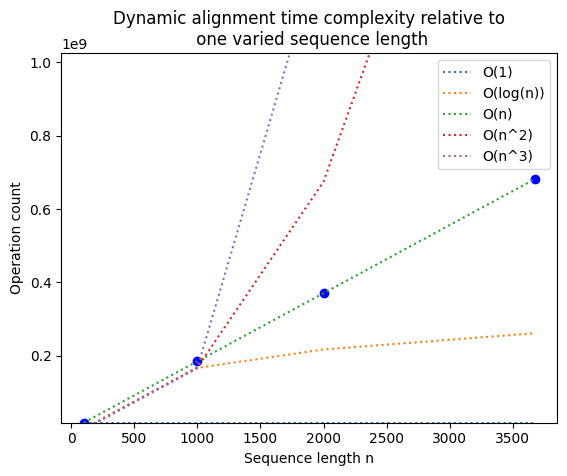

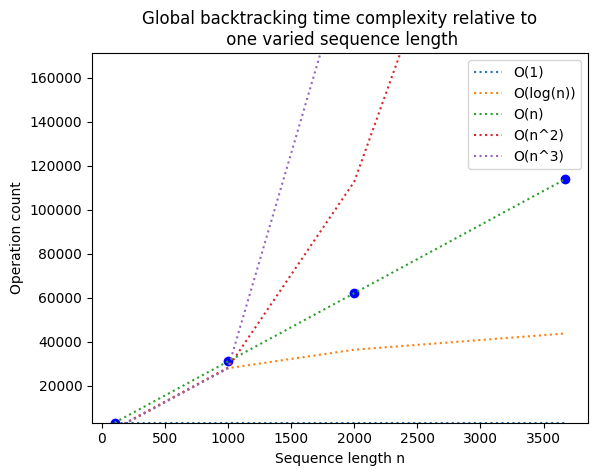

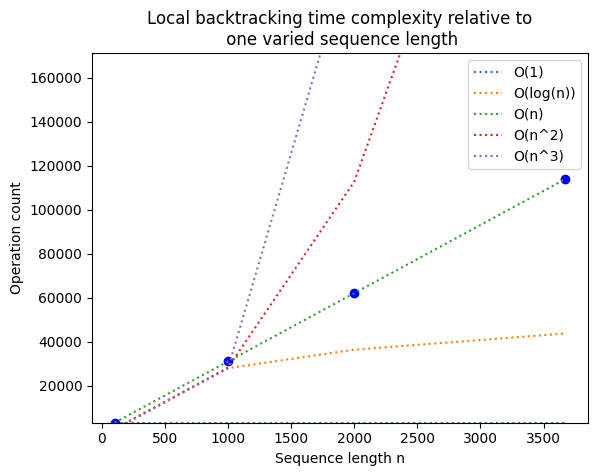

In [17]:
for title,operations in {"Dynamic alignment time complexity relative to\n one varied sequence length":cs,"Global backtracking time complexity relative to\n one varied sequence length":ds,"Local backtracking time complexity relative to\n one varied sequence length":es}.items():
    plot_results(lengths,operations,title)

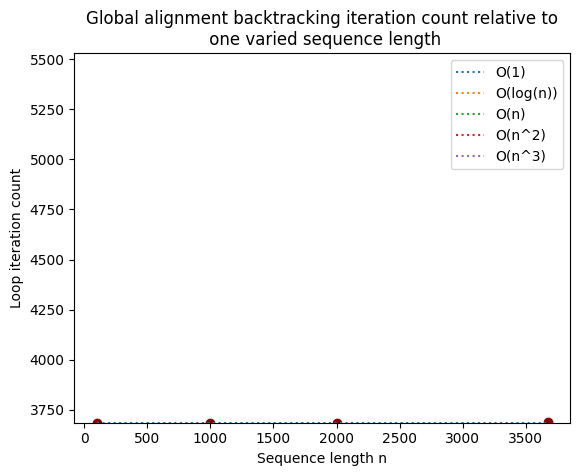

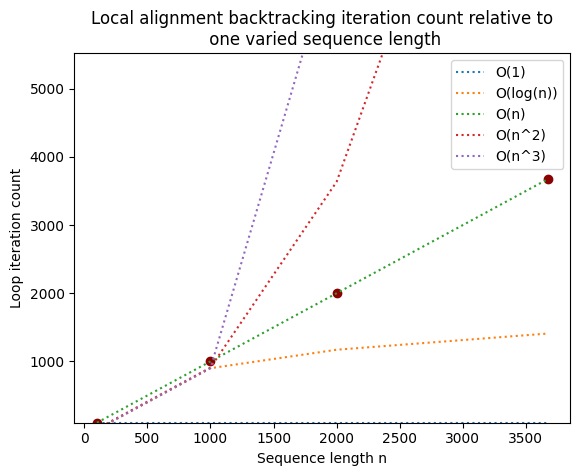

In [18]:
for title,operations in {"Global alignment backtracking iteration count relative to\n one varied sequence length":global_iterations,"Local alignment backtracking iteration count relative to\n one varied sequence length":local_iterations}.items():
    plot_results(lengths,operations,title,"darkred","Loop iteration count")

In [19]:
lengths=[100,1000,2000,len(pig)]
cs,ds,es,global_iterations,local_iterations=[],[],[],[],[]
for length in lengths:
    if length==len(pig):
        globalscores,globalarrows,ignore,global_iteration,local_iteration=canon_test(human,pig)
    else:
        globalscores,globalarrows,ignore,global_iteration,local_iteration=canon_test(human[:length],pig[:length])
    cs.append(c)
    ds.append(d)
    es.append(e)
    global_iterations.append(global_iteration)
    local_iterations.append(local_iteration)
    print("")

Global alignment:
MLWWEEV-EDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDI
|   .|| .|  |||||||||||||.||||||||||||||||.|||||||||||||||||||||||||||||||||||||||.|||.|||||||||||||
M---SEVSSD--EREDVQKKTFTKWINAQFSKFGKQHIENLFNDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALQVLQKNNVDLVNIGSTDI
V----
|    
VDGNH
Score = 420
Optimal alignment score = 420 as expected.
Local alignment:
EV-EDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIV
|| .|  |||||||||||||.||||||||||||||||.|||||||||||||||||||||||||||||||||||||||.|||.||||||||||||||
EVSSD--EREDVQKKTFTKWINAQFSKFGKQHIENLFNDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALQVLQKNNVDLVNIGSTDIV
Score = 443
Optimal alignment score = 443 as expected.
Local alignment length = 96.

Global alignment:
MLWWEEV-EDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDI
|   .|| .|  |||||||||||||.||||||||||||||||.|||||||||||||||||||||||||||||||||||||||.|||.|||||||

Optimal alignment score = 9539 as expected.
Local alignment:
EV-EDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIVDGNH
|| .|  |||||||||||||.||||||||||||||||.|||||||||||||||||||||||||||||||||||||||.|||.||||||||||||||||||
EVSSD--EREDVQKKTFTKWINAQFSKFGKQHIENLFNDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALQVLQKNNVDLVNIGSTDIVDGNH
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAR
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAK
YQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYAYTQA
||||||||||||||.||||||||||||.|||||||||||||||||||||||||.|||.||||||||||||||||||.||||||||.||||||||||||||
YQLGIEKLLDPEDVATTYPDKKSILMYVTSLFQVLPQQVSIEAIQEVEMLPRPSKVTREEHFQLHHQMHYSQQITVCLAQGYERTPSPKPRFKSYAYTQA
AYVTTSDPTRSPFPSQHLEAPEDKSFGSSL

Optimal alignment score = 17877 as expected.
Local alignment:
EV-EDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIVDGNH
|| .|  |||||||||||||.||||||||||||||||.|||||||||||||||||||||||||||||||||||||||.|||.||||||||||||||||||
EVSSD--EREDVQKKTFTKWINAQFSKFGKQHIENLFNDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALQVLQKNNVDLVNIGSTDIVDGNH
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAR
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.
KLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIAK
YQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYAYTQA
||||||||||||||.||||||||||||.|||||||||||||||||||||||||.|||.||||||||||||||||||.||||||||.||||||||||||||
YQLGIEKLLDPEDVATTYPDKKSILMYVTSLFQVLPQQVSIEAIQEVEMLPRPSKVTREEHFQLHHQMHYSQQITVCLAQGYERTPSPKPRFKSYAYTQA
AYVTTSDPTRSPFPSQHLEAPEDKSFGSS

Optimal alignment score = 17884 as expected.
Local alignment length = 3682.



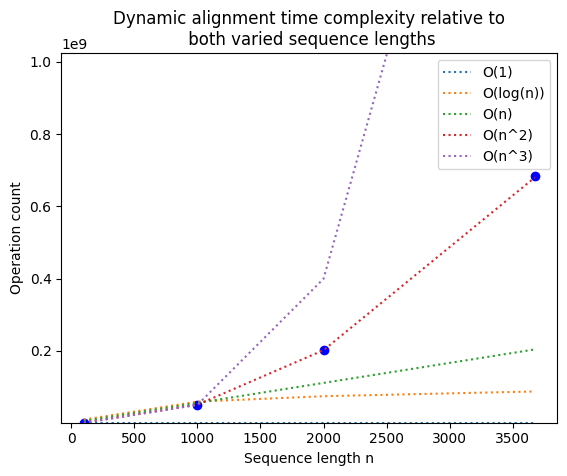

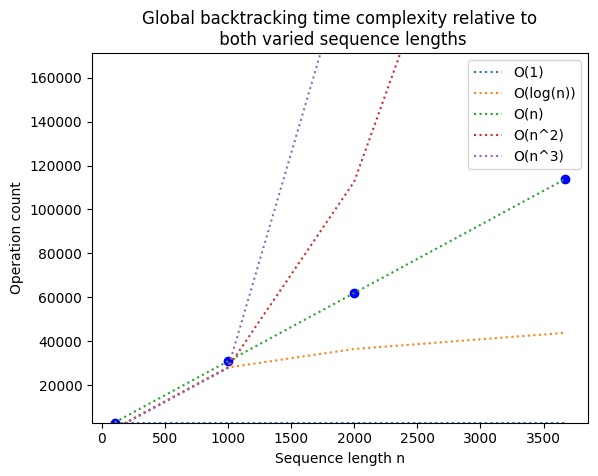

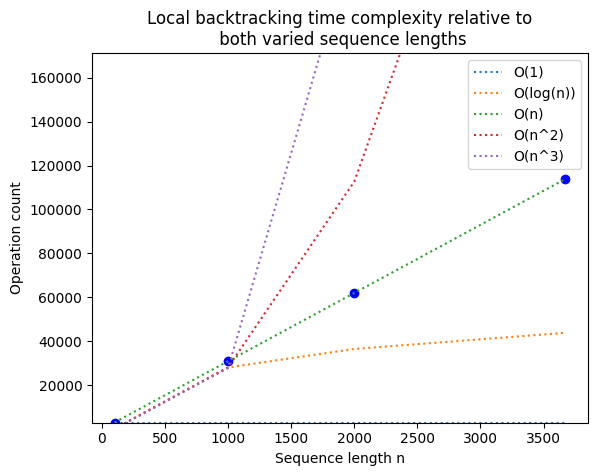

In [20]:
for title,operations in {"Dynamic alignment time complexity relative to\n one varied sequence length":cs,"Global backtracking time complexity relative to\n one varied sequence length":ds,"Local backtracking time complexity relative to\n one varied sequence length":es}.items():
    plot_results(lengths,operations,title.replace("one varied sequence length","both varied sequence lengths"))

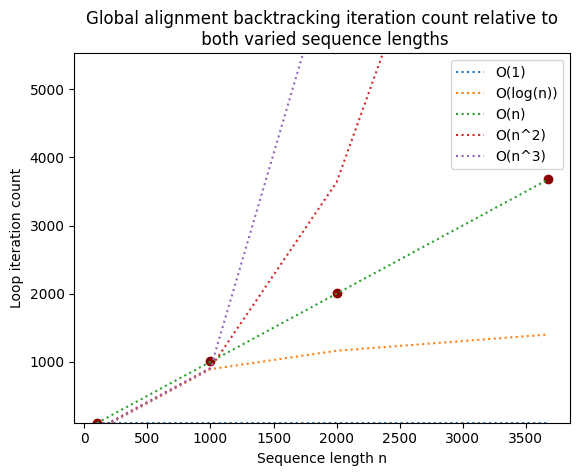

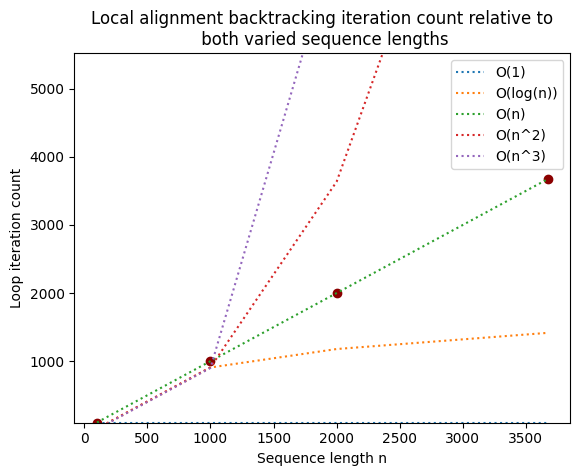

In [21]:
for title,operations in {"Global alignment backtracking iteration count relative to\n both varied sequence lengths":global_iterations,"Local alignment backtracking iteration count relative to\n both varied sequence lengths":local_iterations}.items():
    plot_results(lengths,operations,title,"darkred","Loop iteration count")

# Conclusions

### Complexity
In this notebook we have analyzed the related dynamic programming sequence algorithms, Needleman-Wunsch and Smith-Waterman.  Algorithms have been evaluated for theoretical time complexity, theoretical space complexity, empirical time complexity and correctness in pairwise sequence alignment.  Both algorithms were identified to have Θ(mn) space complexity relative to the two input sequence lengths, due to the construction of an m by n dynamic programming matrix. Time complexity was also Θ(mn) when both sequences were varied, as each matrix cell is visited once and calculation of individual cell values occurs in approximately constant time.  This result can also be represented as Θ(n^2), or quadratic, when both sequences are the same length.  This complexity can be generalized to Θ(n^a) where a is the number of sequences, if larger than 2.  This fact indicates that dynamic programming matrix size, and algorithm complexity itself, grows exponentially with the number of sequences. When more than 2 sequences are being compared, multiple sequence alignment methods which use guide trees to determine the order of added sequences, such as CLUSTAL Omega, are preferred [10]. Both global and local alignment backtracking steps exhibited linear time complexity regardless of whether one or both sequence lengths were varied.  However, the number of loop iterations is constant when only the smaller sequence length is varied, indicating that the real determining factor in complexity is the number of matrix index updates, rather than loop iterations themselves. Though the tested sequences were homologous throughout and thus no local backtracking best cases were observed, local alignment backtracking complexity is technically O(m+n) as it can occur in constant time for small homologous regions.

### Implementation Correctness 
Dynamic programming-based alignment is expected to return an optimal solution as the alignment problem conforms to the principle of optimality, meaning that the optimal solution chosen at each point leads to a globally optimal solution.  Both algorithm implementations returned optimal solutions for canonical and real-world data, as evaluted by an alignment score equal to that of a literature implementation.  All four canonical tests returned logical results (i.e. a gapless but poorly-scored alignment for random letters, a gapless alignment for identical letters, a gap insertion when one sequence possessed a deletion, and a small but high-scoring local alignment when only local similarity was present).  All local dystrophin alignments, when compared a complete to a truncated sequence, identified the expected high-similarity region.  Similarly, global alignment of the full-length human and pig dystrophin sequences produced minimal gaps and some mismatches, a result which matches their degree of evolutionary separation (they are mostly separated by amino acid substitutions).  It is noteworthy that global alignment, while always returning an optimal score, did generally produce multiple smaller gaps rather than a single larger gap when full and truncated sequences were compared.  As a truncation is essentially a single deletion which should be represented by a single gap, this result indicates that only the Smith-Waterman variant produces biologically meaningful results when sequences exhibit significantly different lengths.

### Learning Points

I noticed while programming the backtracking phase that it was more efficient to extend sequences using list append operations, rather than string concatenations, as this operation closely mirrors the stack push operations discussed in the amortized analysis unit.  Specifically, though individual list append operations may be O(n) if a new underlying buffer is produced, aggregate analysis indicates that all such operations will be O(1) on average if the buffer size is increased geometrically rather than linearly.  I also had not previously experienced manually coloring in matrix cells, as used for visualizing the canonical test results.  This process can be easily implemented by creating a numeric matrix with different numbers corresponding to each color, then generating matplotlib ListedColorMap and BoundaryNorm objects which collectively map number ranges to different colors.  Finally, the multiple small gaps produced in the global alignment of different-length sequences is mathematically optimal, but not biologically relevant, as a trnucation mutation represents a single deletion.  Additionally, alignment algorithms should favor single large gaps over multiple smaller gaps because, evolutionarily, the presence of a single insertion or deletion generally impacts organism survival far more than that mutation's length.  A more biologically meaningful approach uses an affine gap penalty (with a larger gap open than gap extend penalty).  Affine gap alignment can be implemented by the Gotoh dynamic programming algorithm, which uses three sets of score matrices and direction matrices (representing ADDXY, SKIPX and SKIPY) to track three potentially optimal paths simultaneously [9].

### Pitfalls
It was noted that the local alignment backtracking step initially exhibited quadratic time complexity due to finding the maxmimum starting point value.  This is an example of the time complexity of the dynamic programming step itself bleeding into the subsequent backtracking step, as it is possible to store the maximum value found during dynamic programming, thus reducing the time complexity of the subsequent step to linear.  Additionally, I originally implemented the dynamic programming step with an affine gap penalty, which resulted in dystrophin alignment scores a few points short of optimalilty.  This inconsistency occured as the Smith-Waterman and Needleman-Wunsch algorithms do not always conform to principle of optimality in this case.  Specifically, a more costly gap open penalty may not be selected by these algorithms if it yields a worse or equal score to another decision at a given cell, though it may lead to an optimal downstream alignment due to the lower gap extend costs.  As an example, one specific problem area was located from positions 5-12 of the pig and human sequence.

Needleman-Wunsch alignment:

--EVEDCYE/SDERED--V

Score = -5

Actual optimal alignment produced by Biopython:

--EVEDCYE/SDEREDV--

Score=-4

Inspecting the dynamic programming matrix revealed that the algorithm chose a mismatch at cell (7,8) as this choice has the same score as creating a new gap from position (6,8).  However, if a new gap is instead created at this site, a better score (-4) is reached by extending this gap.
![alt text](affine_optimality.png "Title")
These results collectively indicate that the algorithms produce mathematically optimal results in only when linear gaps are considered, and exhibit reasonable quadratic complexity when only two sequences are aligned. However, as these algorithms are only capable of producing optimal results with a linear gap penalty, they should not be applied in situations where large gaps are frequent or gap scoring is important, such as alignment between genes with high insertion and deletion frequencies.  

## References

1) Likìc, V. (n.d.). The Needleman-Wunsch algorithm for sequence alignment. San José State University Computer Science. Retrieved June 5, 2022, from https://www.cs.sjsu.edu/~aid/cs152/NeedlemanWunsch.pdf 

2) Altschul, S.F, Pop, M. Sequence Alignment. In: Rosen, K.H., Shier, D.R., Goddard, W., editors. Handbook of Discrete and Combinatorial Mathematics. 2nd edition. Boca Raton (FL): CRC Press/Taylor & Francis; 2017 Nov. Chapter 20.1.

3) Guven, E. (2022). Dynamic Programming. Johns Hopkins University, Baltimore, MD. 

4) Yiu, E. M., & Kornberg, A. J. (2015). Duchenne muscular dystrophy. Journal of Paediatrics and Child Health, 51(8), 759–764. https://doi.org/10.1111/jpc.12868

5) Broomfield, J., Hill, M., Guglieri, M., Crowther, M., & Abrams, K. (2021). Life Expectancy in Duchenne Muscular Dystrophy. Neurology, 97(23), e2304–e2314. https://doi.org/10.1212/wnl.0000000000012910

6) National Center for Biotechnology Information. ClinVar; [VCV000011207.2], https://www.ncbi.nlm.nih.gov/clinvar/variation/VCV000011207.2 (accessed June 28, 2022).

7) Koenig, M., Monaco, A., & Kunkel, L. (1988). The complete sequence of dystrophin predicts a rod-shaped cytoskeletal protein. Cell, 53(2), 219–228. https://doi.org/10.1016/0092-8674(88)90383-2

8) Echigoya, Y., Trieu, N., Duddy, W., Moulton, H. M., Yin, H., Partridge, T. A., Hoffman, E. P., Kornegay, J. N., Rohret, F. A., Rogers, C. S., & Yokota, T. (2021). A Dystrophin Exon-52 Deleted Miniature Pig Model of Duchenne Muscular Dystrophy and Evaluation of Exon Skipping. International Journal of Molecular Sciences, 22(23), 13065. https://doi.org/10.3390/ijms222313065

9) Erhand, F. (2016, November 4). The algorithm of Gotoh. Gone Viral - a Blog about Computational Methods in Virology. Retrieved June 28, 2022, from http://florianerhard.github.io/2016/gotoh2

10) Sievers, F., Wilm, A., Dineen, D., Gibson, T. J., Karplus, K., Li, W., Lopez, R., McWilliam, H., Remmert, M., Söding, J., Thompson, J. D., & Higgins, D. G. (2011). Fast, scalable generation of high‐quality protein multiple sequence alignments using Clustal Omega. Molecular Systems Biology, 7(1), 539. https://doi.org/10.1038/msb.2011.75